In [1]:
#libraries used
import numpy as np
from numpy import array
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter
from scipy import stats
from scipy import signal
import statistics
from fitter import Fitter, get_common_distributions, get_distributions
from statsmodels.graphics.tsaplots import plot_acf
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading data
data = read_csv(r'...\drug200.csv')

Let's begin with some basic EDA

## EDA

In [3]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
#checking for missing data
print(data.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [5]:
age = data['Age']
sex = data['Sex']
bp = data['BP']
ch = data['Cholesterol']
nak = data['Na_to_K']
drug = data['Drug']

Let's analyze each feature individually

### Age

#### Statistics

In [6]:
print('The mean of the age values is:', np.mean(age))
print('The median of the age values is:', np.median(age))
print('The mode of the age values is:', statistics.mode(age))
print('Standard deviation of the age values:', np.std(age))
print('Quartiles:',np.quantile(age,[0,0.25,0.5,0.75,1]))

The mean of the age values is: 44.315
The median of the age values is: 45.0
The mode of the age values is: 47
Standard deviation of the age values: 16.502902017524065
Quartiles: [15. 31. 45. 58. 74.]


#### Distribution

The best fitted distribution for the age data is: {'uniform': {'loc': 15.0, 'scale': 59.0}}


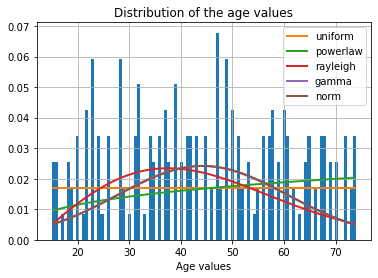

In [7]:
f = Fitter(age, distributions = get_common_distributions())
f.fit()
f.summary()
print('The best fitted distribution for the age data is:', f.get_best(method = 'sumsquare_error'))
plt.xlabel('Age values')
plt.title('Distribution of the age values')
plt.show()

Let's consider three age intervals: <35, [35, 55], >55   

#### Age classes distribution

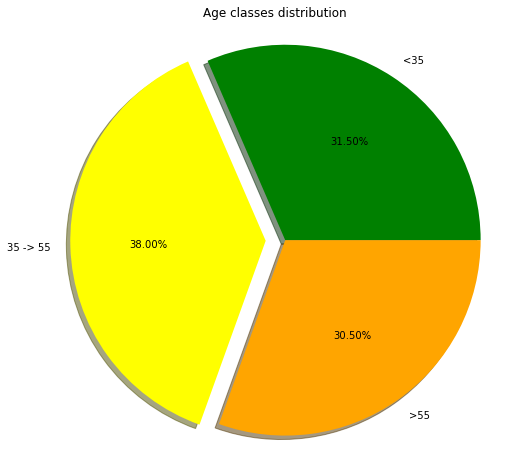

In [8]:
low = 0
med = 0
high = 0

for i in range(len(age)):
    if age[i] < 35:
        low += 1
    if age[i] >= 35 and age[i] <= 55:
        med += 1
    if age[i] > 55:
        high += 1

age_nr = [low, med, high]
labels = ['<35', '35 -> 55', '>55']
plt.figure(figsize = (8,8))
plt.pie(age_nr, labels = labels, autopct='%1.2f%%', explode=(0.0, 0.1, 0.0), shadow = True, colors = ['green', 'yellow', 'orange'])
plt.axis('equal')
plt.title('Age classes distribution')
plt.show()

As it can be seen, the pretty uniform distributed based in the age intervals (affirmation supported by the best fitted distribution showed in the plot above).

### Sex

In [9]:
print('Number of apperances for each sex type:', Counter(sex))

Number of apperances for each sex type: Counter({'M': 104, 'F': 96})


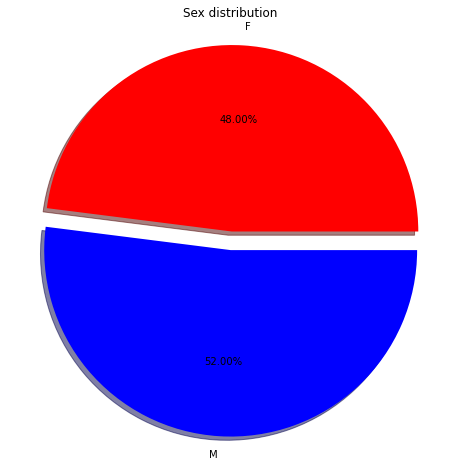

In [10]:
sex_labels = list(Counter(sex))
sex_count = [Counter(sex)[sex_labels[i]] for i in range(len(sex_labels))]
sex_colors = ['red', 'blue']
plt.figure(figsize = (8,8))
plt.pie(sex_count, labels = sex_labels, autopct='%1.2f%%', explode=(0.0, 0.1), shadow = True, colors = sex_colors)
plt.axis('equal')
plt.title('Sex distribution')
plt.show()

### Blood Pressure (BP)

In [11]:
print('Number of apperances for each blood pressure type:', Counter(bp))

Number of apperances for each blood pressure type: Counter({'HIGH': 77, 'LOW': 64, 'NORMAL': 59})


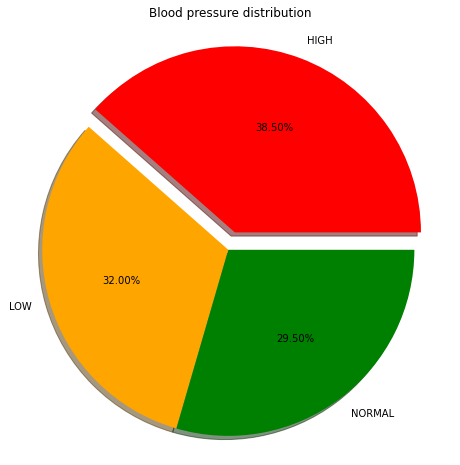

In [12]:
bp_labels = list(Counter(bp))
bp_count = [Counter(bp)[bp_labels[i]] for i in range(len(bp_labels))]
bp_colors = ['red', 'orange', 'green']
plt.figure(figsize = (8,8))
plt.pie(bp_count, labels = bp_labels, autopct='%1.2f%%', explode=(0.1, 0.0, 0.0), shadow = True, colors = bp_colors)
plt.axis('equal')
plt.title('Blood pressure distribution')
plt.show()

### Cholesterol

In [13]:
print('Number of apperances for each cholesterol type:', Counter(ch))

Number of apperances for each cholesterol type: Counter({'HIGH': 103, 'NORMAL': 97})


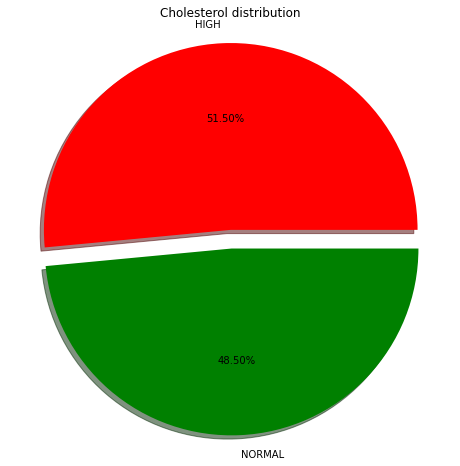

In [14]:
ch_labels = list(Counter(ch))
ch_count = [Counter(ch)[ch_labels[i]] for i in range(len(ch_labels))]
ch_colors = ['red',  'green']
plt.figure(figsize = (8,8))
plt.pie(ch_count, labels = ch_labels, autopct='%1.2f%%', explode=(0.1, 0.0), shadow = True, colors = ch_colors)
plt.axis('equal')
plt.title('Cholesterol distribution')
plt.show()

### Na to K

#### Statistics

In [15]:
print('The mean of the Na to K values is:', np.mean(nak))
print('The median of the Na to K values is:', np.median(nak))
print('The mode of the Na to K values is:', statistics.mode(nak))
print('Standard deviation of the Na to K values:', np.std(nak))
print('Quartiles:',np.quantile(nak,[0,0.25,0.5,0.75,1]))

The mean of the Na to K values is: 16.08448499999999
The median of the Na to K values is: 13.9365
The mode of the Na to K values is: 18.295
Standard deviation of the Na to K values: 7.205873008163204
Quartiles: [ 6.269  10.4455 13.9365 19.38   38.247 ]


#### Distribution

The best fitted distribution for the Na to K data is: {'lognorm': {'s': 0.6356821831593016, 'loc': 4.560073121026775, 'scale': 9.496677115457679}}


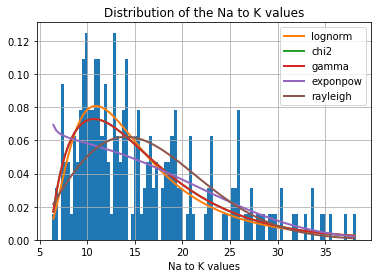

In [16]:
f = Fitter(nak, distributions = get_common_distributions())
f.fit()
f.summary()
print('The best fitted distribution for the Na to K data is:', f.get_best(method = 'sumsquare_error'))
plt.xlabel('Na to K values')
plt.title('Distribution of the Na to K values')
plt.show()

Let's split the Na to K values in three intervals: <17, 17 -> 28, >28 

#### Na to K classes distribution

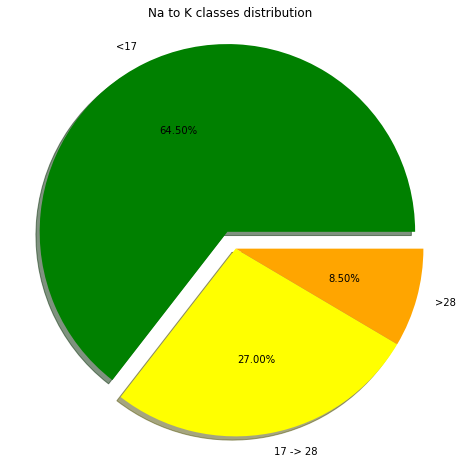

In [17]:
low = 0
med = 0
high = 0

for i in range(len(nak)):
    if nak[i] < 17:
        low += 1
    if nak[i] >= 17 and nak[i] <= 28:
        med += 1
    if nak[i] > 28:
        high += 1

nak_nr = [low, med, high]
nak_labels = ['<17', '17 -> 28', '>28']
nak_colors = ['green', 'yellow', 'orange']
plt.figure(figsize = (8,8))
plt.pie(nak_nr, labels = nak_labels, autopct='%1.2f%%', explode=(0.1, 0.0, 0.0), shadow = True, colors = nak_colors)
plt.axis('equal')
plt.title('Na to K classes distribution')
plt.show()

### Drug

In [18]:
print('Number of apperances for each drug type:', Counter(drug))

Number of apperances for each drug type: Counter({'DrugY': 91, 'drugX': 54, 'drugA': 23, 'drugC': 16, 'drugB': 16})


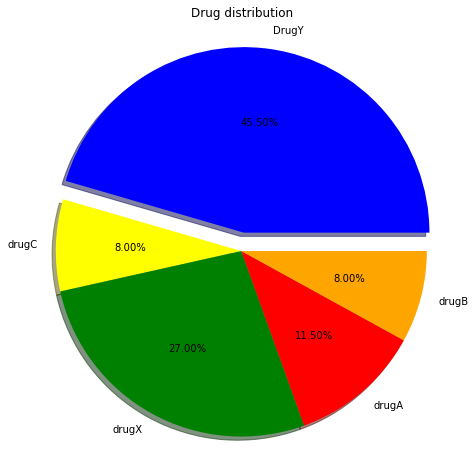

In [19]:
drug_labels = list(Counter(drug))
drug_count = [Counter(drug)[drug_labels[i]] for i in range(len(drug_labels))]
drug_colors = ['blue', 'yellow',  'green', 'red', 'orange']
plt.figure(figsize = (8,8))
plt.pie(drug_count, labels = drug_labels, autopct='%1.2f%%', explode=(0.1, 0.0, 0.0, 0.0, 0.0), shadow = True, colors = drug_colors)
plt.axis('equal')
plt.title('Drug distribution')
plt.show()

Next, let's see if we can find any connections between features.

#### Age vs Blood Pressure

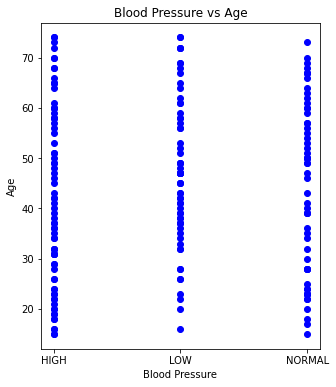

In [20]:
plt.figure(figsize = (5,6))
plt.scatter(bp, age, c = 'blue')
plt.xlabel('Blood Pressure')
plt.ylabel('Age')
plt.title('Blood Pressure vs Age')
plt.show()

No specific age interval for spefific blood pressure category, therfore, no correlation(more specific analysis is required).

#### Age vs Cholesterol

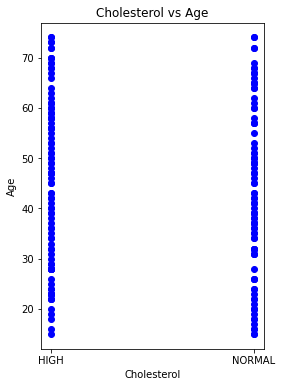

In [21]:
plt.figure(figsize = (4,6))
plt.scatter(ch, age, c = 'blue')
plt.xlabel('Cholesterol')
plt.ylabel('Age')
plt.title('Cholesterol vs Age')
plt.show()

No specific age interval for spefific cholesterol category, therfore, no correlation(more specific analysis is required).

#### Age vs Na to K

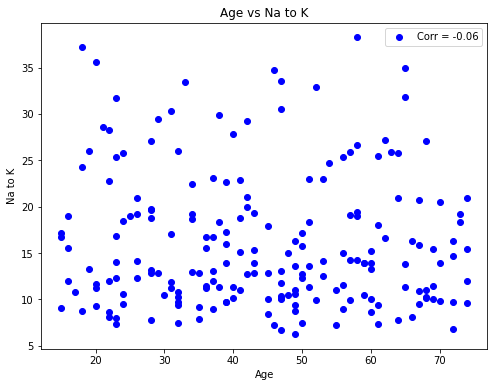

In [22]:
corr, _ = stats.pearsonr(age,nak)
plt.figure(figsize = (8,6))
plt.scatter(age, nak, c = 'blue')
plt.legend(['Corr = '+str(round(corr,2))], loc='best')
plt.xlabel('Age')
plt.ylabel('Na to K')
plt.title('Age vs Na to K')
plt.show()

No correlation.

#### Age vs Drug

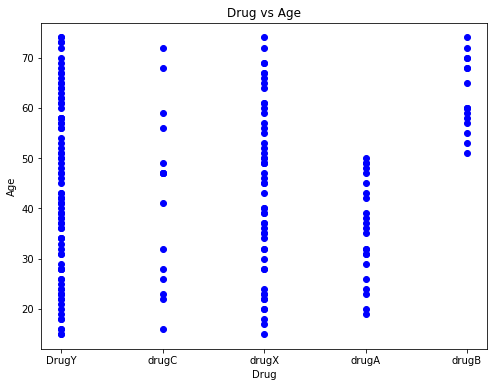

In [23]:
plt.figure(figsize = (8,6))
plt.scatter(drug, age, c = 'blue')
plt.xlabel('Drug')
plt.ylabel('Age')
plt.title('Drug vs Age')
plt.show()

It seems that drugB was suitable for older people only (> 50), meanwhile, drugA was suitable for people younger than 50.

#### Blood Pressure vs Colesterol
It's obvious that a scatter plot is not helpful in this scenario. So let's see, for each combination (i.e high blood presure and high colesterol, normal blood pressure and high colesterol, ...), the number of appearances.

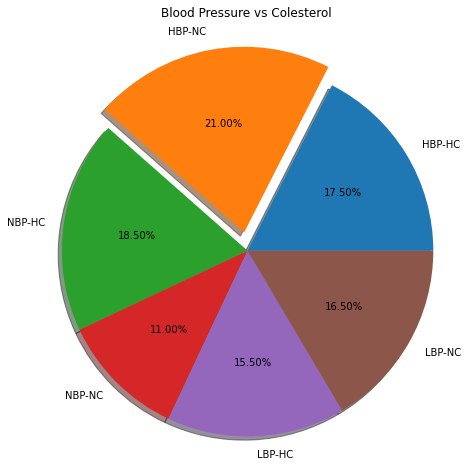

In [24]:
labels = ['HBP-HC','HBP-NC', 'NBP-HC', 'NBP-NC', 'LBP-HC', 'LBP-NC']
hbp_hc = len([bp[i] for i in range(len(bp)) if bp[i] == 'HIGH' and ch[i] == 'HIGH'])
hbp_nc = len([bp[i] for i in range(len(bp)) if bp[i] == 'HIGH' and ch[i] == 'NORMAL'])
nbp_hc = len([bp[i] for i in range(len(bp)) if bp[i] == 'NORMAL' and ch[i] == 'HIGH'])
nbp_nc = len([bp[i] for i in range(len(bp)) if bp[i] == 'NORMAL' and ch[i] == 'NORMAL'])
lbp_hc = len([bp[i] for i in range(len(bp)) if bp[i] == 'LOW' and ch[i] == 'HIGH'])
lbp_nc = len([bp[i] for i in range(len(bp)) if bp[i] == 'LOW' and ch[i] == 'NORMAL'])
values = [hbp_hc, hbp_nc, nbp_hc, nbp_nc, lbp_hc, lbp_nc]

plt.figure(figsize = (8,8))
plt.pie(values,labels = labels, autopct='%1.2f%%', explode=(0.0, 0.1, 0.0, 0.0, 0.0, 0.0), shadow = True)
plt.axis('equal')
plt.title('Blood Pressure vs Colesterol')
plt.show()

As it can be seen, no Blood Pressure class is connected with a Colesterol class.

#### Blood Pressure vs Sex

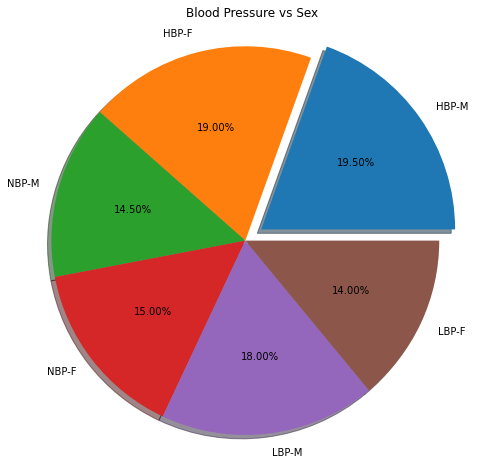

In [25]:
labels = ['HBP-M','HBP-F', 'NBP-M', 'NBP-F', 'LBP-M', 'LBP-F']
hbp_m = len([bp[i] for i in range(len(bp)) if bp[i] == 'HIGH' and sex[i] == 'M'])
hbp_f = len([bp[i] for i in range(len(bp)) if bp[i] == 'HIGH' and sex[i] == 'F'])
nbp_m = len([bp[i] for i in range(len(bp)) if bp[i] == 'NORMAL' and sex[i] == 'M'])
nbp_f = len([bp[i] for i in range(len(bp)) if bp[i] == 'NORMAL' and sex[i] == 'F'])
lbp_m = len([bp[i] for i in range(len(bp)) if bp[i] == 'LOW' and sex[i] == 'M'])
lbp_f = len([bp[i] for i in range(len(bp)) if bp[i] == 'LOW' and sex[i] == 'F'])
values = [hbp_m, hbp_f, nbp_m, nbp_f, lbp_m, lbp_f]

plt.figure(figsize = (8,8))
plt.pie(values,labels = labels, autopct='%1.2f%%', explode=(0.1, 0.0, 0.0, 0.0, 0.0, 0.0), shadow = True)
plt.axis('equal')
plt.title('Blood Pressure vs Sex')
plt.show()

No connection between Blood Pressure and Sex.

#### Blood Pressure vs Na to K

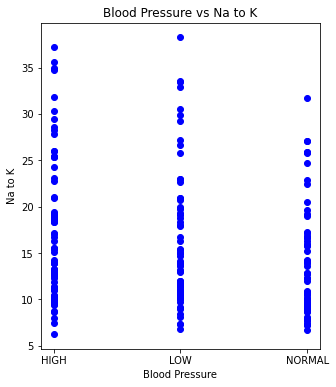

In [26]:
plt.figure(figsize = (5,6))
plt.scatter(bp, nak, c = 'blue')
plt.xlabel('Blood Pressure')
plt.ylabel('Na to K')
plt.title('Blood Pressure vs Na to K')
plt.show()

No connection between Blood Pressure and Na to K (indeed, the density is higher in the first half of the Na to K value interval, but, looking at the Na to K distribution makes us understand that it is expected to happen like this).

Next, let's see if the drug type is connected with any other feature (the relation between the drug type and age has already been discussed).

In [27]:
print(data.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


#### Drug vs Na to K

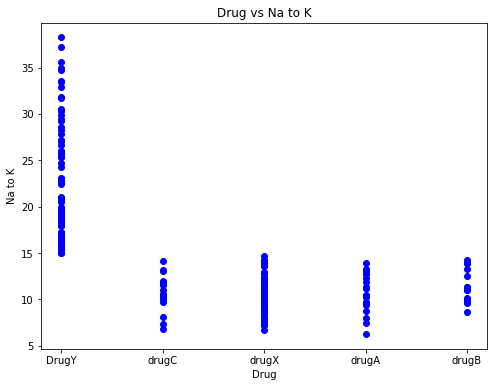

In [28]:
plt.figure(figsize = (8,6))
plt.scatter(drug, nak, c = 'blue')
plt.xlabel('Drug')
plt.ylabel('Na to K')
plt.title('Drug vs Na to K')
plt.show()

As it can be seen, drugY is a better fit for pacients where the Na to K value is bigger than 15, meanwhile the other drugs correspond to a Na to K value smaller than 15.

Drug vs Sex

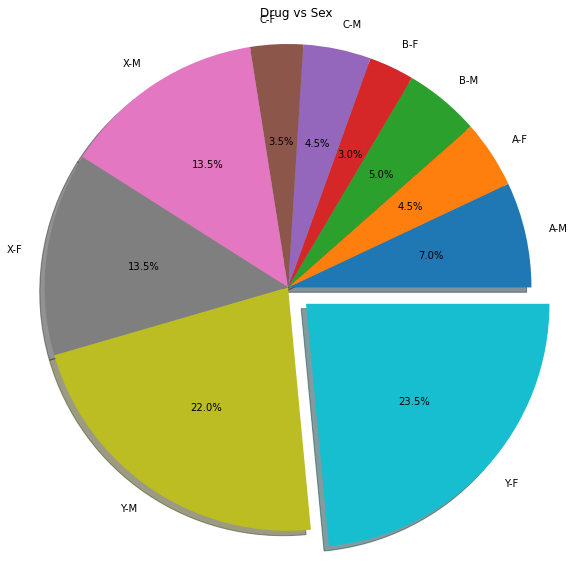

In [29]:
labels = ['A-M','A-F','B-M','B-F','C-M','C-F','X-M','X-F','Y-M','Y-F']
a_m = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugA' and sex[i] == 'M'])
a_f = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugA' and sex[i] == 'F'])
b_m = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugB' and sex[i] == 'M'])
b_f = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugB' and sex[i] == 'F'])
c_m = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugC' and sex[i] == 'M'])
c_f = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugC' and sex[i] == 'F'])
x_m = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugX' and sex[i] == 'M'])
x_f = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugX' and sex[i] == 'F'])
y_m = len([drug[i] for i in range(len(drug)) if drug[i] == 'DrugY' and sex[i] == 'M'])
y_f = len([drug[i] for i in range(len(drug)) if drug[i] == 'DrugY' and sex[i] == 'F'])
values = [a_m,a_f,b_m,b_f,c_m,c_f,x_m,x_f,y_m,y_f]

plt.figure(figsize = (10,10))
plt.pie(values,labels = labels, autopct='%1.1f%%', explode=(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1), shadow = True)
plt.axis('equal')
plt.title('Drug vs Sex')
plt.show()

The only connection I can see between Drug type and sex is that the male population for which drugA and drugB were best fitted is significantly bigger than the female population for which the best fitted drug was drugA respectively drugB.

#### Drug vs Cholesterol

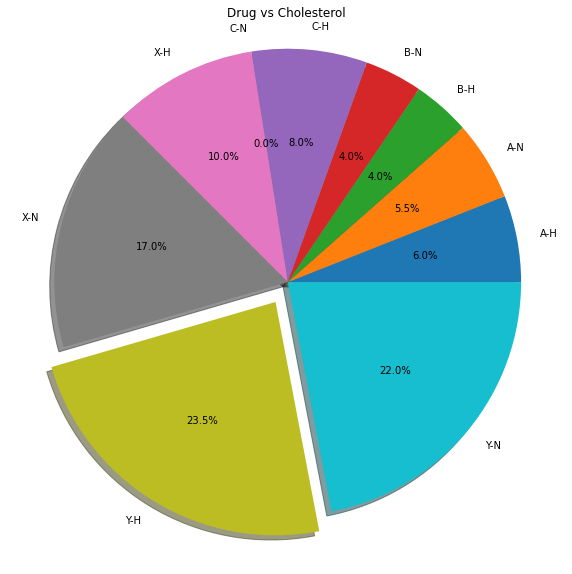

In [30]:
labels = ['A-H','A-N','B-H','B-N','C-H','C-N','X-H','X-N','Y-H','Y-N']
a_h = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugA' and ch[i] == 'HIGH'])
a_n = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugA' and ch[i] == 'NORMAL'])
b_h = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugB' and ch[i] == 'HIGH'])
b_n = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugB' and ch[i] == 'NORMAL'])
c_h = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugC' and ch[i] == 'HIGH'])
c_n = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugC' and ch[i] == 'NORMAL'])
x_h = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugX' and ch[i] == 'HIGH'])
x_n = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugX' and ch[i] == 'NORMAL'])
y_h = len([drug[i] for i in range(len(drug)) if drug[i] == 'DrugY' and ch[i] == 'HIGH'])
y_n = len([drug[i] for i in range(len(drug)) if drug[i] == 'DrugY' and ch[i] == 'NORMAL'])
values = [a_h,a_n,b_h,b_n,c_h,c_n,x_h,x_n,y_h,y_n]

plt.figure(figsize = (10,10))
plt.pie(values,labels = labels, autopct='%1.1f%%', explode=(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0), shadow = True)
plt.axis('equal')
plt.title('Drug vs Cholesterol')
plt.show()

DrugC was suitable aonly for people with high colesterol and drugX was given 1.7 times more to people with normal colesterol than people with high colesterol.

#### Drug vs Blood Pressure

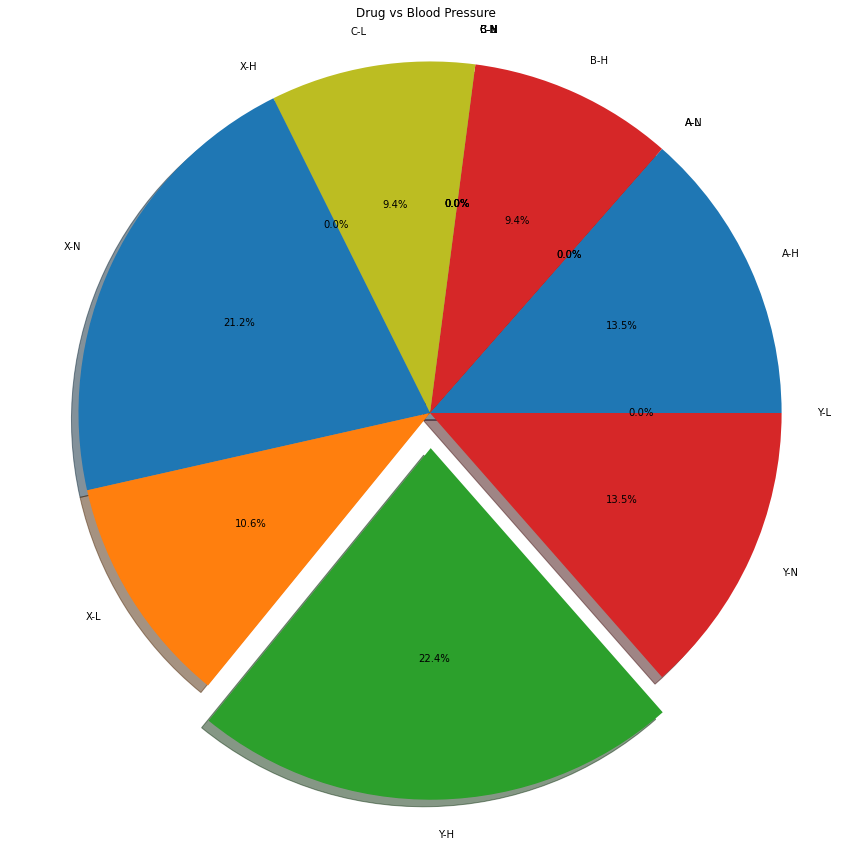

In [31]:
labels = ['A-H','A-N','A-L','B-H','B-N','B-L','C-H','C-N','C-L','X-H','X-N','X-L','Y-H','Y-N','Y-L']
a_h = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugA' and bp[i] == 'HIGH'])
a_n = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugA' and bp[i] == 'NORMAL'])
a_l = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugA' and bp[i] == 'LOW'])
b_h = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugB' and bp[i] == 'HIGH'])
b_n = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugB' and bp[i] == 'NORMAL'])
b_l = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugB' and bp[i] == 'LOW'])
c_h = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugC' and bp[i] == 'HIGH'])
c_n = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugC' and bp[i] == 'NORMAL'])
c_l = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugC' and bp[i] == 'LOW'])
x_h = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugX' and bp[i] == 'HIGH'])
x_n = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugX' and bp[i] == 'NORMAL'])
x_l = len([drug[i] for i in range(len(drug)) if drug[i] == 'drugX' and bp[i] == 'LOW'])
y_h = len([drug[i] for i in range(len(drug)) if drug[i] == 'DrugY' and bp[i] == 'HIGH'])
y_n = len([drug[i] for i in range(len(drug)) if drug[i] == 'DrugY' and bp[i] == 'NORMAL'])
y_l = len([drug[i] for i in range(len(drug)) if drug[i] == 'DrugA' and bp[i] == 'LOW'])
values = [a_h,a_n,a_l,b_h,b_n,b_l,c_h,c_n,c_l,x_h,x_n,x_l,y_h,y_n,y_l]

plt.figure(figsize = (15,15))
plt.pie(values,labels = labels, autopct='%1.1f%%', explode=(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0), shadow = True)
plt.axis('equal')
plt.title('Drug vs Blood Pressure')
plt.show()

1. drugA: only for high blood pressure
2. drugB: only for high blood pressure
3. drugC: only for low blood pressure
4. drugX: not for high blood pressure and two times more recomended as suitable for normal blood pressure pacients than to low blood pressure pacients.
5. drugY: not for low blod pressure and almost two times more recomamded as suitable for high blodd pressure then normal bloos pressure.

As it was proved above (and as it has been expected), each feature: age, sex, blood pressure, cholesterol, no to k is valuable in choosing the most recomanded drug. Therefore it makes sense to try to predict the most suitable drug based on those features, and this is what I'll be doing next.

Let's prepare the train and test data: 80% from each drug type for train (randomly selected), and the remaining 20% as test data.

#### Indexes

In [104]:
ind_a = [i for i in range(len(drug)) if drug[i] == 'drugA']
ind_b = [i for i in range(len(drug)) if drug[i] == 'drugB']
ind_c = [i for i in range(len(drug)) if drug[i] == 'drugC']
ind_x = [i for i in range(len(drug)) if drug[i] == 'drugX']
ind_y = [i for i in range(len(drug)) if drug[i] == 'DrugY']


from random import sample

train_a = sample(ind_a,int(8*len(ind_a)/10))
test_a = [i for i in ind_a if i not in train_a]

train_b = sample(ind_b,int(8*len(ind_b)/10))
test_b = [i for i in ind_b if i not in train_b]

train_c = sample(ind_c,int(8*len(ind_c)/10)) 
test_c = [i for i in ind_c if i not in train_c]

train_x = sample(ind_x,int(8*len(ind_x)/10)) 
test_x = [i for i in ind_x if i not in train_x]

train_y = sample(ind_y,int(8*len(ind_y)/10)) 
test_y = [i for i in ind_y if i not in train_y]

train_ind = np.hstack((train_a,train_b,train_c,train_x,train_y))
train_ind = np.sort(train_ind) # here the sorted index list is not a must since we have a classification problem
test_ind = np.hstack((test_a,test_b,test_c,test_x,test_y))
test_ind = np.sort(test_ind)

#### Labels

In [105]:
print('-------------------- SEX --------------------')
unique_sex = np.unique(data['Sex'])
label_sex = np.linspace(0,len(unique_sex)-1,len(unique_sex))
label_sex = [int(i) for i in range(len(label_sex))]
for i in range(len(unique_sex)):
    print('For '+str(unique_sex[i])+' we have the following numeric label: '+str(label_sex[i]))


print('-------------------- Blood Pressure --------------------')
unique_bp = np.unique(data['BP'])
label_bp = np.linspace(0,len(unique_bp)-1,len(unique_bp))
label_bp = [int(i) for i in range(len(label_bp))]
for i in range(len(unique_bp)):
    print('For '+str(unique_bp[i])+' we have the following numeric label: '+str(label_bp[i]))

print('-------------------- Cholesterol --------------------')
unique_ch = np.unique(data['Cholesterol'])
label_ch = np.linspace(0,len(unique_ch)-1,len(unique_ch))
label_ch = [int(i) for i in range(len(label_ch))]
for i in range(len(unique_ch)):
    print('For '+str(unique_ch[i])+' we have the following numeric label: '+str(label_ch[i]))


print('-------------------- DRUGS --------------------')
unique_drugs = np.unique(data['Drug'])
label_drugs = np.linspace(0,len(unique_drugs)-1,len(unique_drugs))
label_drugs = [int(i) for i in range(len(label_drugs))]
for i in range(len(unique_drugs)):
    print('For '+str(unique_drugs[i])+' we have the following numeric label: '+str(label_drugs[i]))

-------------------- SEX --------------------
For F we have the following numeric label: 0
For M we have the following numeric label: 1
-------------------- Blood Pressure --------------------
For HIGH we have the following numeric label: 0
For LOW we have the following numeric label: 1
For NORMAL we have the following numeric label: 2
-------------------- Cholesterol --------------------
For HIGH we have the following numeric label: 0
For NORMAL we have the following numeric label: 1
-------------------- DRUGS --------------------
For DrugY we have the following numeric label: 0
For drugA we have the following numeric label: 1
For drugB we have the following numeric label: 2
For drugC we have the following numeric label: 3
For drugX we have the following numeric label: 4


In [106]:
def get_label_sex(sx):    
    for lab in range(len(label_sex)):
        if unique_sex[lab] == sx:
            val = lab
            break
    return val

def get_label_bp(bps):    
    for lab in range(len(label_bp)):
        if unique_bp[lab] == bps:
            val = lab
            break
    return val

def get_label_ch(chl):    
    for lab in range(len(label_ch)):
        if unique_ch[lab] == chl:
            val = lab
            break
    return val

def get_label_drug(drg):    
    for lab in range(len(label_drugs)):
        if unique_drugs[lab] == drg:
            val = lab
            break
    return val

#### Train & Test Data

In [107]:
seq_x = np.hstack((int(age[train_ind[0]]), get_label_sex(sex[train_ind[0]]), get_label_bp(bp[train_ind[0]]), get_label_ch(ch[train_ind[0]]), nak[train_ind[0]]))
seq_y = get_label_drug(drug[train_ind[0]])
X_train = seq_x
y_train = seq_y
for i in range(1,len(train_ind)):
    seq_x = np.hstack((int(age[train_ind[i]]), get_label_sex(sex[train_ind[i]]), get_label_bp(bp[train_ind[i]]), get_label_ch(ch[train_ind[i]]), nak[train_ind[i]]))
    seq_y = get_label_drug(drug[train_ind[i]])
    X_train = np.vstack((X_train,seq_x))
    y_train = np.vstack((y_train,seq_y))

In [108]:
seq_x = np.hstack((int(age[test_ind[0]]), get_label_sex(sex[test_ind[0]]), get_label_bp(bp[test_ind[0]]), get_label_ch(ch[test_ind[0]]), nak[test_ind[0]]))
seq_y = get_label_drug(drug[test_ind[0]])
X_test = seq_x
y_test = seq_y
for i in range(1,len(test_ind)):
    seq_x = np.hstack((int(age[test_ind[i]]), get_label_sex(sex[test_ind[i]]), get_label_bp(bp[test_ind[i]]), get_label_ch(ch[test_ind[i]]), nak[test_ind[i]]))
    seq_y = get_label_drug(drug[test_ind[i]])
    X_test = np.vstack((X_test,seq_x))
    y_test = np.vstack((y_test,seq_y))

In [109]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(157, 5)
(157, 1)
(43, 5)
(43, 1)


## Models
The goal is to use three different Classifiers: XGBoost, Random Forest and SVM, tune them and compare the results to see which one is the most efficient/suitable for this specific data set.

### XGBoost

In [110]:
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import xgboost as xgb

In [111]:
m1 = xgb.XGBClassifier()
m1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

I've observed that, in this situation, the unoptimized xgb model gives a 97% accuracy. Therefore I'll just 'play' a litle with max_depth in order to get a 100% accuracy.

In [112]:
m2 = xgb.XGBClassifier(max_depth = 3, gamma = 0, colsample_bytree = 1, min_child_weight = 1, n_estimators = 100)
m2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [113]:
y_pred_xgb_unopt = m1.predict(X_test)

In [114]:
y_pred_xgb_opt = m2.predict(X_test)

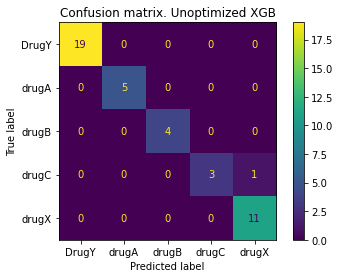

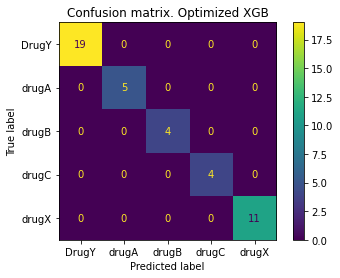

Accuracy(%) for the unoptimized XGB model: 97.67441860465117 %
Accuracy(%) for the optimized XGB model: 100.0 %


In [115]:
cm1 = metrics.confusion_matrix(y_test,y_pred_xgb_unopt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = unique_drugs)
cm_display.plot()
plt.title('Confusion matrix. Unoptimized XGB')

cm2 = metrics.confusion_matrix(y_test,y_pred_xgb_opt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = unique_drugs)
cm_display.plot()
plt.title('Confusion matrix. Optimized XGB')
plt.show()

acc1 = (100*np.trace(cm1))/np.sum(cm1)
acc2 = (100*np.trace(cm2))/np.sum(cm2)

print('Accuracy(%) for the unoptimized XGB model:', acc1,'%')
print('Accuracy(%) for the optimized XGB model:', acc2,'%')

No strong parameters tunning was required in this situation in order to get a significant improvement.

### Random Forest

In [203]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
m3 = RandomForestClassifier(n_estimators = 10, random_state = 0)
m3.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

Again, we have a great accuracy from beggining (97%), therefore an increasement of the number of estimators should be enough to get the 100% accuracy.

In [183]:
m4 = RandomForestClassifier(n_estimators = 25, random_state = 0)
m4.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=0)

In [184]:
y_pred_rf_unopt = m3.predict(X_test)

In [185]:
y_pred_rf_opt = m4.predict(X_test)

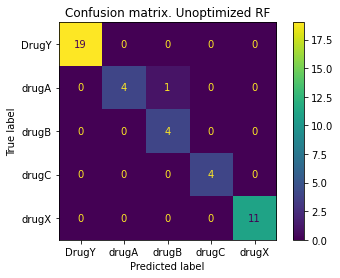

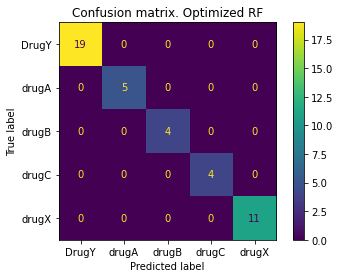

Accuracy(%) for the unoptimized RF model: 97.67441860465117 %
Accuracy(%) for the optimized RF model: 100.0 %


In [186]:
cm3 = metrics.confusion_matrix(y_test,y_pred_rf_unopt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm3, display_labels = unique_drugs)
cm_display.plot()
plt.title('Confusion matrix. Unoptimized RF')
plt.show()

cm4 = metrics.confusion_matrix(y_test,y_pred_rf_opt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm4, display_labels = unique_drugs)
cm_display.plot()
plt.title('Confusion matrix. Optimized RF')
plt.show()

acc3 = (100*np.trace(cm3))/np.sum(cm3)
acc4 = (100*np.trace(cm4))/np.sum(cm4)

print('Accuracy(%) for the unoptimized RF model:', acc3,'%')
print('Accuracy(%) for the optimized RF model:', acc4,'%')

### Suport Vector Machine

In [158]:
from sklearn import svm

In [222]:
m5 = svm.SVC()
m5.fit(X_train, y_train)

SVC()

In [223]:
m6 = svm.SVC(kernel = 'linear')
m6.fit(X_train, y_train)

SVC(kernel='linear')

In [224]:
y_pred_svm_unopt = m5.predict(X_test)

In [225]:
y_pred_svm_opt = m6.predict(X_test)

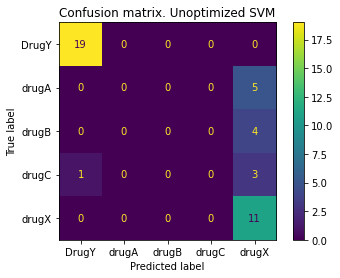

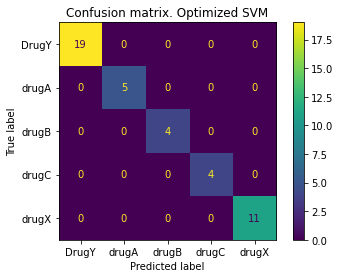

Accuracy(%) for the unoptimized RF model: 69.76744186046511 %
Accuracy(%) for the optimized RF model: 100.0 %


In [226]:
cm5 = metrics.confusion_matrix(y_test,y_pred_svm_unopt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm5, display_labels = unique_drugs)
cm_display.plot()
plt.title('Confusion matrix. Unoptimized SVM')

cm6 = metrics.confusion_matrix(y_test,y_pred_svm_opt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm6, display_labels = unique_drugs)
cm_display.plot()
plt.title('Confusion matrix. Optimized SVM')
plt.show()

acc5 = (100*np.trace(cm5))/np.sum(cm5)
acc6 = (100*np.trace(cm6))/np.sum(cm6)


print('Accuracy(%) for the unoptimized RF model:', acc5,'%')
print('Accuracy(%) for the optimized RF model:', acc6,'%')

As it can be seen, only by selecting the right kernel we got the highest accuracy (for other kernels, the result is not as good as this one).

### Gaussian Process Classifier (GPC)

In [227]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [241]:
m7 = GaussianProcessClassifier()
m7.fit(X_train,y_train)

GaussianProcessClassifier()

In [242]:
m8 = GaussianProcessClassifier(n_restarts_optimizer=1)
m8.fit(X_train,y_train)

GaussianProcessClassifier(n_restarts_optimizer=1)

In [243]:
y_pred_gpc_unopt = m7.predict(X_test)

In [244]:
y_pred_gpc_opt = m8.predict(X_test)

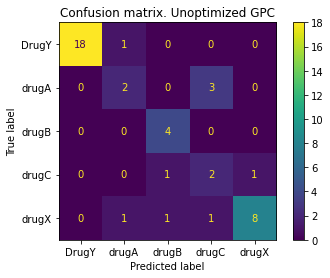

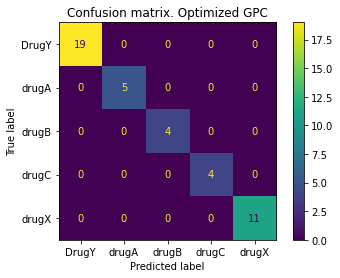

Accuracy(%) for the unoptimized GPC model: 79.06976744186046 %
Accuracy(%) for the optimized GPC model: 100.0 %


In [246]:
cm7 = metrics.confusion_matrix(y_test,y_pred_gpc_unopt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm7, display_labels = unique_drugs)
cm_display.plot()
plt.title('Confusion matrix. Unoptimized GPC')

cm8 = metrics.confusion_matrix(y_test,y_pred_svm_opt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm8, display_labels = unique_drugs)
cm_display.plot()
plt.title('Confusion matrix. Optimized GPC')
plt.show()

acc7 = (100*np.trace(cm7))/np.sum(cm7)
acc8 = (100*np.trace(cm8))/np.sum(cm8)


print('Accuracy(%) for the unoptimized GPC model:', acc7,'%')
print('Accuracy(%) for the optimized GPC model:', acc8,'%')

## Results

Visualization of the accuracy results for all models

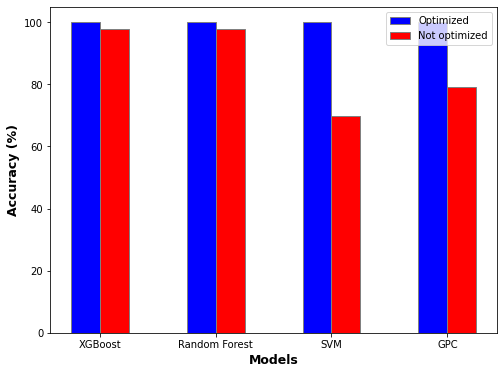

In [253]:
accuracy_unopt = [acc1, acc3, acc5, acc7]
accuracy_opt = [acc2, acc4, acc6, acc8]

barWidth = 0.25
br1 = np.arange(len(accuracy_opt))
br2 = [x + barWidth for x in br1]

fig = plt.subplots(figsize =(8, 6))
plt.bar(br1, accuracy_opt, color = 'blue', width = barWidth, edgecolor = 'grey', label = 'Optimized')
plt.bar(br2, accuracy_unopt, color = 'red', width = barWidth, edgecolor = 'grey', label = 'Not optimized')
plt.xlabel('Models', fontweight ='bold', fontsize = 12.5)
plt.ylabel('Accuracy (%)', fontweight ='bold', fontsize = 12.5)
plt.xticks([r + barWidth/2 for r in range(len(accuracy_opt))], ['XGBoost', 'Random Forest', 'SVM', 'GPC'])
plt.legend(loc = 'best')
plt.show()

## Conclusions
1. The BASIC optimization process worked significantly for all models.
2. This data set is definitely great for Classification, as it can be seen from above: 100% accuracy has been obtained for all 4 models.